In [8]:
from sympy import *
from sympy.matrices import *
init_printing(use_latex=true)
import operator, functools

t1,t2,t3,t4,t5,t6,l1,l2,l3,d1,d2,d3,d4,d5,d6 = symbols('\\theta_1, \\theta_2, \\theta_3, \\theta_4, \\theta_5, \\theta_6, l_1,l_2,l_3,d_1,d_2,d_3,d_4,d_5,d_6')
x,y,z = symbols('x,y,z')

def dhs(a,alpha,d,theta):
    M = Matrix([[cos(theta),-sin(theta)*cos(alpha),sin(theta)*sin(alpha),a*cos(theta)],
                  [sin(theta),cos(theta)*cos(alpha),-cos(theta)*sin(alpha),a*sin(theta)],
                  [0,sin(alpha),cos(alpha),d],
                  [0,0,0,1]])
    return M

class Manipulator(object):
    def __init__(self,*args):
        self.Ts = []
        self.type = []
        for k in args:
            self.Ts.append(dhs(k[0],k[1],k[2],k[3]))
            if len(k)>4:
                self.type.append(k[4])
            else:
                self.type.append('r')
        self.dof = len(args)
    
    def z(self,i):
        if i == 0: return Matrix([[0],[0],[1]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,2]
    
    def p(self,i):
        if i == 0: return Matrix([[0],[0],[0]])
        MTH = eye(4)
        for k in range(i):
            MTH = MTH*self.Ts[k]
        return MTH[:3,3]
    
    @property
    def J(self):
        n = self.dof
        M_ = zeros(6,n)
        for i in range(self.dof):
            if self.type[i]=='r':
                jp = self.z(i).cross(self.p(n) - self.p(i))
                jo = self.z(i)
            else:
                jp = self.z(i)
                jo = zeros(3,1)
            jp = jp.col_join(jo)
            M_[:,i] = jp
        return simplify(M_)
    
    @property
    def T(self):
        return simplify(functools.reduce(operator.mul, self.Ts))


In [9]:
TR = Manipulator((l1,0,0,t1)) #R
TP = Manipulator((0,0,d1,0,'p')) #P
T1 = Manipulator((0,pi/2,d1,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
T2 = Manipulator((l1,0,0,t1),(l2,0,0,t2)) # RR
T3 = Manipulator((0,pi/2,0,t1,'r'),(0,0,d1,0,'p')) ## RP
T4 = Manipulator((0,pi/2,d1,0,'p'), (0,pi/2,d2,pi/2,'p'), (0,0,d3,0,'p')) # PPP
T6DOF = Manipulator((0,-pi/2,0,t1,'r'), (0,pi/2,d2,t2,'r'), (0,0,d3,0,'p'),
                    (0,-pi/2,0,t4),(0,pi/2,0,t5),(0,0,d6,t6)) # PPP

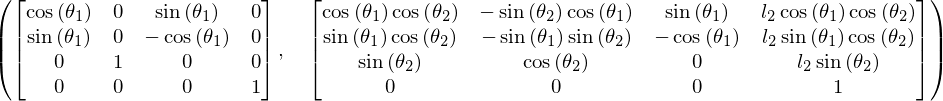

In [35]:
RRR = Manipulator((0,pi/2,d1,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
RRR1 = Manipulator((l1,0,0,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
RR = Manipulator((l1,0,0,t1),(l2,0,0,t2)) # RR
RRR0 = Manipulator((0,pi/2,0,t1),(l2,0,0,t2)) # RRR
RRR0.Ts[0],RRR0.Ts[0]*RRR0.Ts[1]
#RRR0.J

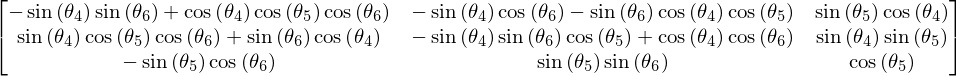

In [8]:
import operator, functools
RRR = Manipulator((0,pi/2,d1,t1),(l2,0,0,t2),(l3,0,0,t3)) # RRR
PPP = Manipulator((0,pi/2,d1,0,'p'), (0,pi/2,d2,pi/2,'p'), (0,0,d3,0,'p')) # PPP
RRP = Manipulator((l1,0,0,t1),(l2,0,0,t2),(0,0,d3,0,'p')) # RR
T63 = T6DOF.Ts[3]*T6DOF.Ts[4]*T6DOF.Ts[5]
R63 = T63[:3,:3]
R63

In [45]:
import numpy as np
x,y = 200,50
d1 = np.sqrt(x**2+y**2)
t1 = np.arctan2(x,-y)
t1p = 5
d1p = 20
vx = d1*np.cos(t1)*t1p + np.sin(t1)*d1p
vy = d1*np.sin(t1)*t1p - np.cos(t1)*d1p
v = np.sqrt(vx**2 + vy**2)
vx,vy,v

In [5]:
np.arctan(-vy/vx)*180/np.pi

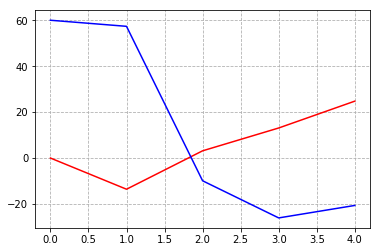

In [6]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

l1, l2 = 100, 100
t = np.array([0,1,2,3,4,5])
t1 = np.array([0,0.1,0.5,0.3,0.1,0.2])
t2 =  np.array([0,0.4,0.2,0.5,0.6,0.1])
t1p = diff(t1)/np.diff(t)
t2p = diff(t2)/np.diff(t)
w = t1p + t2p
vx = (-l1*np.sin(t1[:-1]) - l2*np.sin(t1[:-1]+t2[:-1]))*t1p + (-l2*np.sin(t1[:-1]+t2[:-1]))*t2p
vy = (l1*np.cos(t1[:-1]) + l2*np.cos(t1[:-1]+t2[:-1]))*t1p + (l2*np.cos(t1[:-1]+t2[:-1]))*t2p
plt.plot(t[:-1],vx,'r');
plt.plot(t[:-1],vy,'b');
#plt.plot(t[:-1],w,'g');
plt.grid(ls='--')

In [7]:
t = symbols('t')
x = Function('x')(t)
y = Function('y')(t)
diff(atan(y/x),t)

TypeError: cannot determine truth value of Relational